In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import os

# !pip install fire
# !pip install tqdm

home_dir = '/content/gdrive/My Drive/A0/aispace'
os.chdir(home_dir)
!pwd

import os
# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

import shutil
import os

Mounted at /content/gdrive/
/content/gdrive/My Drive/A0/aispace
/content/gdrive/My Drive/A0/aispace


In [ ]:
# !pip install rasterio
# !pip install accelerate
# !pip install peft
# !pip install transformers
# # !pip install transformers==4.33.0
# !pip install datasets

In [ ]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [ ]:
import json

chkpt_list = [30000, 30000, 30000, 30000, 12000, 9000, 11000]
chkpt_list = [8000, 8000, 8000, 16000, ] #8000, 8000, 13000]

!pwd

learning_rates_all = []
losses_all = []
steps_all = [0,]
for ii, chkpt in enumerate(chkpt_list):  # range(4):
    json_file = f'./A0[optim_sophia]/run[{ii}]/checkpoint-{chkpt}/trainer_state.json'
    # json_file = f'./A0[float]/run[{ii}]/checkpoint-30000/trainer_state.json'
    # json_file = f'./checkpoint-25000/trainer_state.json'
    # Open the JSON file for reading
    with open(json_file, 'r') as json_file:
        data = json.load(json_file)

        display(data['log_history'][-1])


    data = data['log_history']

    # Extract 'learning_rate', 'loss', and 'step' values from the data
    learning_rates = [item['learning_rate'] for item in data]
    losses = [item['loss'] for item in data]
    steps = [item['step'] for item in data]

    learning_rates_all.extend(learning_rates)
    losses_all.extend(losses)

    shift_step = steps_all[-1]
    shifted_steps = [step + shift_step for step in steps]
    steps = shifted_steps
    steps_all.extend(steps)


display(data[0])

steps_all.pop(0)

print(len(losses_all), len(steps_all), steps_all)

/content/gdrive/My Drive/A0


{'epoch': 200.0, 'learning_rate': 0.0002, 'loss': 0.4071, 'step': 8000}

{'epoch': 200.0, 'learning_rate': 0.0002, 'loss': 0.3673, 'step': 8000}

{'epoch': 200.0, 'learning_rate': 0.0002, 'loss': 0.3539, 'step': 8000}

{'epoch': 400.0, 'learning_rate': 0.0002, 'loss': 0.3548, 'step': 16000}

{'epoch': 5.0, 'learning_rate': 0.0002, 'loss': 0.3516, 'step': 200}

200 200 [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200, 14400, 14600, 14800, 15000, 15200, 15400, 15600, 15800, 16000, 16200, 16400, 16600, 16800, 17000, 17200, 17400, 17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000, 19200, 19400, 19600, 19800, 20000, 20200, 20400, 20600, 20800, 21000, 21200, 21400, 21600, 21800, 22000, 22200, 22400, 22600, 22800, 23000, 23200, 23400, 23600, 23800, 24000, 24200, 24400, 24600, 24800, 25000, 25200, 25400, 25600, 25800, 26000, 26200, 26400, 26600, 26800, 27000, 27200, 27400, 27600, 27800, 28000, 28200, 28400, 28600, 28800, 29000, 29200, 29400, 29600, 29800, 3

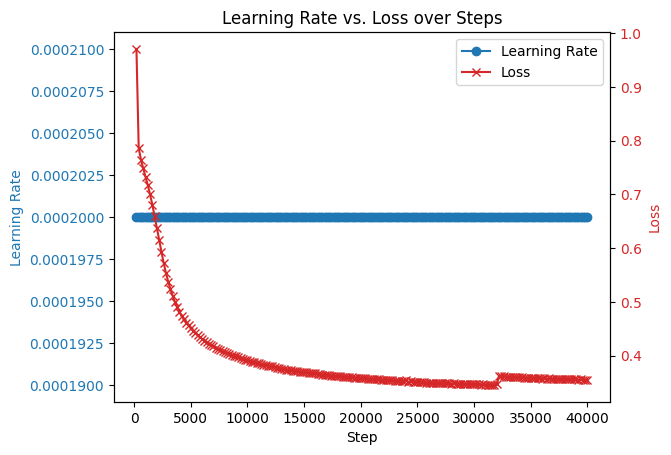

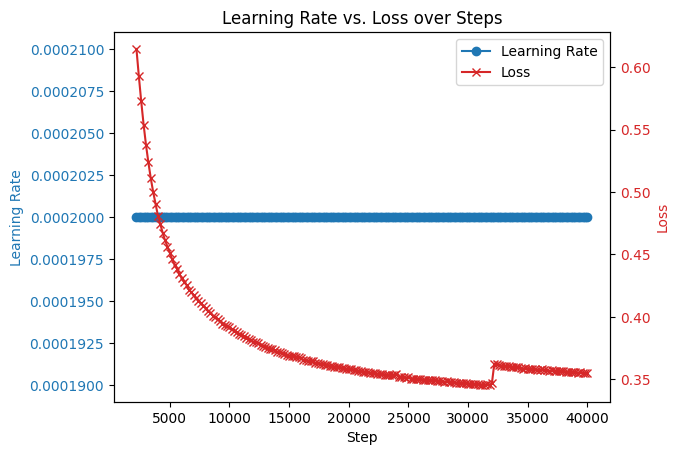

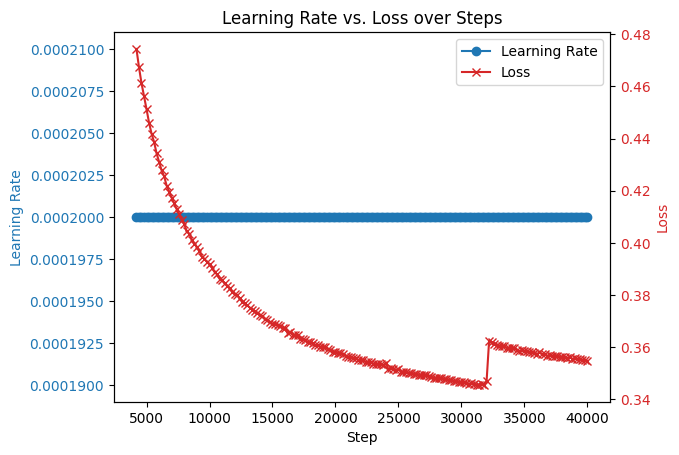

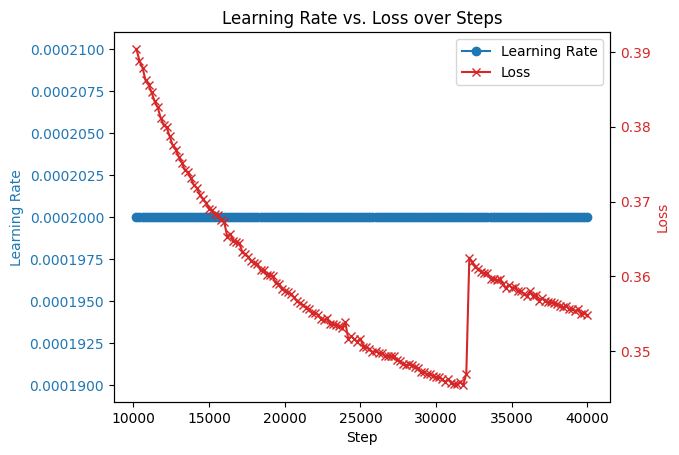

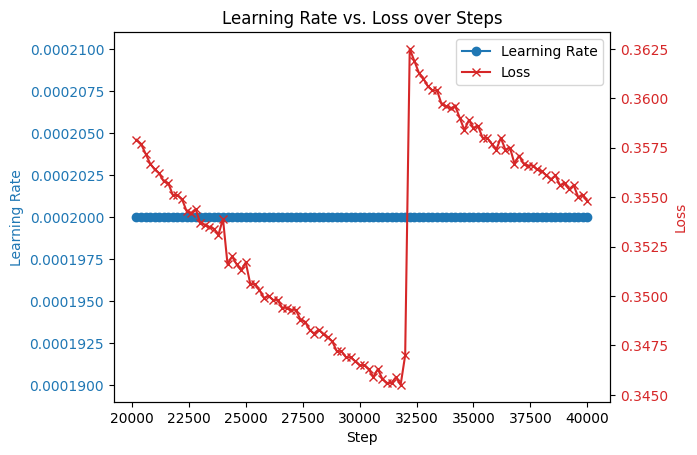

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# # Your data
# data = [
#     {'epoch': 1.56, 'learning_rate': 3.90625e-06, 'loss': 0.4483, 'step': 200},
#     # Add more data points as needed
# ]

# # Extract 'learning_rate', 'loss', and 'step' values from the data
# learning_rates = [item['learning_rate'] for item in data]
# losses = [item['loss'] for item in data]
# steps = [item['step'] for item in data]
# shift_step = 250001
# # Shift 'step' values
# shifted_steps = [step + shift_step for step in steps]

# steps = shifted_steps

def plot_state(steps_all, learning_rates_all, losses_all):
    # Create a plot with 'step' on the x-axis
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Step')
    ax1.set_ylabel('Learning Rate', color='tab:blue')
    ax1.plot(steps_all, learning_rates_all, color='tab:blue', label='Learning Rate', marker='o')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for 'loss'
    ax2 = ax1.twinx()
    ax2.set_ylabel('Loss', color='tab:red')
    ax2.plot(steps_all, losses_all, color='tab:red', label='Loss', marker='x')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Show the plot
    plt.title('Learning Rate vs. Loss over Steps')
    plt.show()

plot_state(steps_all[:], learning_rates_all[:], losses_all[:])
plot_state(steps_all[10:], learning_rates_all[10:], losses_all[10:])
plot_state(steps_all[20:], learning_rates_all[20:], losses_all[20:])
plot_state(steps_all[50:], learning_rates_all[50:], losses_all[50:])
plot_state(steps_all[100:], learning_rates_all[100:], losses_all[100:])
